In [1]:
%load_ext autoreload
%autoreload 2
%cd C:\MAD4AG
%matplotlib inline

C:\MAD4AG


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df_survey = pd.read_pickle(f'./dbs/survey_act_weekday.pkl')

In [4]:
def cluster_tempo(pur=None, survey=None, interval=60, norm=True):
    """
    :param interval: resolution of temporal counting in minute, e.g., 30 min
    :type interval: int
    :param pur: Purpose to add to the activity
    :type pur: str
    :param survey: Input data from the survey
    :type survey: dataframe
    :return: A dataframe of half-hour frequency of a certain activity.

    """
    holder_size = int( 24 * (60 / interval))
    holder = np.zeros((holder_size, 1))

    temps=list(survey.loc[survey['purpose'] == pur, ['h_s', 'dur']].to_records(index=False))
    number_ppl= len(survey[survey.purpose==pur].sub_id.unique())

    for tm in temps:
        start_ = int(np.floor(tm[0] / interval))
        end_ = int(np.floor((tm[0]+ int(tm[1])) / interval))
        holder[start_:end_ + 1, 0] += 1

    #print(holder)

    holder_day = holder
    df = pd.DataFrame()
    df.loc[:, 'time'] = range(0, len(holder_day))
    df.loc[:, 'freq'] = holder_day
    if norm:
        df['freq'][df['freq']>number_ppl]= number_ppl
        df.loc[:, 'freq'] /= number_ppl
    if pur is not None:
        df.loc[:, 'activity'] = pur
    return df

In [5]:
df_act = df_survey.copy()
#df_act = pd.read_csv('Master Thesis/Master Thesis Colab/DataFolder/Cag_survey_final_new.csv')

df_act['urban_density'] =df_act['act_deso'].str[4]

In [6]:
home_all = cluster_tempo( survey=df_act, pur='Home', interval=60, norm=True )
#home_all = home_all.pivot(index='activity', columns='time', values='freq')

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## by urban density

In [7]:
home_A = cluster_tempo( survey=df_act[df_act.urban_density=='A'], pur='Home', interval=60, norm=True )
home_A['activity'] = 'A'
home_B = cluster_tempo( survey=df_act[df_act.urban_density=='B'], pur='Home', interval=60, norm=True )
home_B['activity'] = 'B'
home_C = cluster_tempo( survey=df_act[df_act.urban_density=='C'], pur='Home', interval=60, norm=True )
home_C['activity'] = 'C'

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df_survey_tempo = [home_all, home_A,home_B,home_C]

df_survey_tempo = pd.concat(df_survey_tempo)

df_survey_tempo = df_survey_tempo.pivot(index='activity', columns='time', values='freq')

In [9]:
df_survey_tempo.to_csv(f'./dbs/intermediate/homefreq_Bytime.csv')


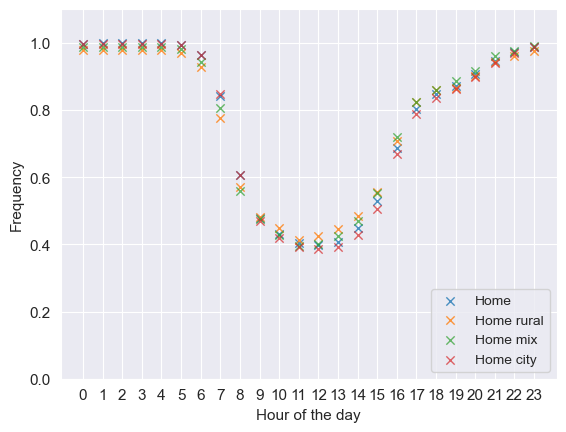

In [10]:
plt.scatter(range(0,24), df_survey_tempo.loc['Home', :].values.tolist(), label='Home', marker='x', alpha=0.8,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['A', :].values.tolist(), label='Home rural', marker='x', alpha=0.8,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['B', :].values.tolist(), label='Home mix', marker='x', alpha=0.7,linewidths=1)
plt.scatter(range(0,24), df_survey_tempo.loc['C', :].values.tolist(), label='Home city', marker='x', alpha=0.7,linewidths=1)
plt.xlabel('Hour of the day', fontsize=11)
plt.ylabel('Frequency', fontsize=11)

x_labels = range(0, 24)  # Generate labels from 1 to 24
x_ticks = range(0, 24, 1)  # Position the labels every other data point
plt.ylim(0, 1.1)
plt.xticks(x_ticks, x_labels, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=10, frameon=True, loc='lower right')
plt.savefig('figures/temporal_visitation_pattern.png', dpi=300, bbox_inches="tight")


plt.show()

## performs the two-sample Kolmogorov-Smirnov (KS) test

In [11]:
from scipy.stats import ks_2samp

for sample in ['A', 'B','C']:
    # Generate two sample datasets (replace these with your actual data)
    sample1 = df_survey_tempo.loc['Home', :].values.tolist()
    sample2 = df_survey_tempo.loc[sample, :].values.tolist()

    # Perform the KS test
    statistic, p_value = ks_2samp(sample1, sample2)

    # Print the results
    print(sample+ " KS Statistic:", statistic)
    print(sample+ " P-value:", p_value)

    # Compare p-value to the chosen significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The samples do not come from the same distribution.")
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")

A KS Statistic: 0.2916666666666667
A P-value: 0.26283384201555077
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
B KS Statistic: 0.25
B P-value: 0.4490368220409109
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
C KS Statistic: 0.20833333333333334
C P-value: 0.686017125117228
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.


In [12]:
# Generate two sample datasets (replace these with your actual data)
sample1 = df_survey_tempo.loc['A', :].values.tolist()
sample2 = df_survey_tempo.loc['C', :].values.tolist()

# Perform the KS test
statistic, p_value = ks_2samp(sample1, sample2)

# Print the results
print(" KS Statistic:", statistic)
print(" P-value:", p_value)

# Compare p-value to the chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The samples do not come from the same distribution.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")

 KS Statistic: 0.2916666666666667
 P-value: 0.26283384201555077
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.


## by urban density

In [13]:
county_list = df_act[df_act.purpose=='Home'].home_county.unique()

home_county_list = []
for county in county_list:
    home_county = cluster_tempo( survey=df_act[df_act.home_county==county], pur='Home', interval=60, norm=True )
    home_county_list.append(home_county)

    home_county['activity'] = county



#home_A = cluster_tempo( survey=df_act[df_act.urban_density=='A'], pur='Home', interval=60, norm=True )


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
df_survey_county = pd.concat(home_county_list)

df_survey_county = df_survey_county.pivot(index='activity', columns='time', values='freq')

In [15]:
for sample in county_list:
    # Generate two sample datasets (replace these with your actual data)
    sample1 = df_survey_tempo.loc['Home', :].values.tolist()
    sample2 = df_survey_county.loc[sample, :].values.tolist()

    # Perform the KS test
    statistic, p_value = ks_2samp(sample1, sample2)



    # Compare p-value to the chosen significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: The samples do not come from the same distribution.")
        print(str(sample)+ " KS Statistic:", statistic)
        print(str(sample)+ " P-value:", p_value)
    else:
        print("Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.")


Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude different distributions.
Fail to reject the null hypothesis: There is not enough evidence to conclude diffe